In [4]:
#Importing Libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import LSTM
from keras.layers import Dense, Activation, Embedding, Dropout, TimeDistributed,Input

In [6]:
# reading the data from data file
df = pd.read_csv('data.csv')
print(df[:5])

          Date      Open      High       Low     Close  Shares Traded  \
0  15-Oct-2018  10524.20  10526.30  10410.15  10512.50      267517728   
1  16-Oct-2018  10550.15  10604.90  10525.30  10584.75      273444095   
2  17-Oct-2018  10688.70  10710.15  10436.45  10453.05      293586908   
3  19-Oct-2018  10339.70  10380.10  10249.60  10303.55      368552204   
4  22-Oct-2018  10405.85  10408.55  10224.00  10245.25      306472776   

   Turnover (Rs. Cr)  
0           14372.15  
1           15453.03  
2           17173.14  
3           20505.66  
4           17241.94  


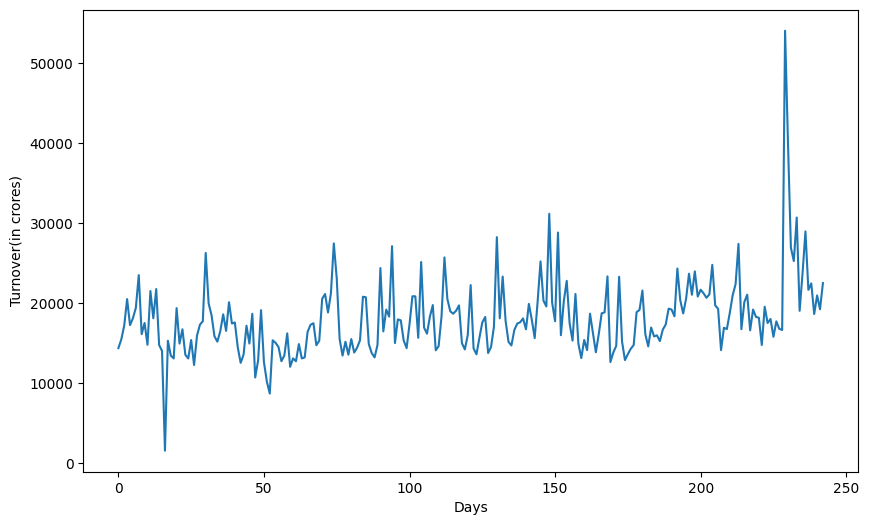

In [10]:
# plotting the turnover values
data = df.iloc[:,6].values
plt.figure(figsize=(10, 6))
plt.xlabel('Days')
plt.ylabel('Turnover(in crores)')
plt.plot(data)

In [11]:
# Divide into train and test data
df['Date'] = pd.to_datetime(df['Date'])  
mask = (df['Date'] == '2019-4-18')
print(df.loc[mask])     # index for the date 18-Apr-2019
print('--------------------------------------------')
train = data[:205]
test = data[175:]
print(train)

          Date      Open      High      Low    Close  Shares Traded  \
126 2019-04-18  11856.15  11856.15  11738.5  11752.8      339653709   

     Turnover (Rs. Cr)  
126           18271.27  
--------------------------------------------
[14372.15 15453.03 17173.14 20505.66 17241.94 18114.71 19413.24 23503.76
 16120.14 17514.85 14789.51 21513.85 18111.88 21758.8  14761.17 14006.19
  1534.08 15294.83 13445.33 13078.98 19374.89 14937.67 16728.88 13540.9
 13077.24 15382.32 12254.36 15927.25 17296.28 17737.28 26283.43 19964.33
 18484.91 15857.16 15176.26 16488.87 18597.83 16524.36 20112.91 17447.45
 17582.8  14486.1  12528.59 13556.45 17172.64 14945.94 18663.85 10695.6
 12831.99 19119.88 12615.01 10176.13  8688.26 15352.25 15030.45 14516.74
 12731.29 13433.48 16213.3  12031.26 13084.6  12732.57 14879.91 13081.63
 13215.83 16408.83 17289.7  17483.62 14736.91 15298.48 20542.36 21144.33
 18832.06 21214.81 27471.18 23112.37 15478.81 13435.13 15172.85 13542.69
 15507.05 13818.92 14424.78 15360.

In [12]:
# Normalize the train and test data using min-max scaler
sc = MinMaxScaler(feature_range = (0, 1))
train = sc.fit_transform(train.reshape(-1,1))
test = sc.transform(test.reshape(-1,1))

In [13]:
#Create X_train using 30 timesteps for each sample
X_train = []
y_train = []
for i in range(30, train.shape[0]):
    X_train.append(train[i-30:i, 0])
    y_train.append(train[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [14]:
# Training LSTM model

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
lstm_model = Sequential()
lstm_model.add(LSTM(8, input_shape=(X_train.shape[1], 1), activation='relu',kernel_initializer='lecun_uniform'))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer = 'adam', loss = 'mean_squared_error')

lstm_model.fit(X_train, y_train, epochs = 45, batch_size = 4)

Epoch 1/45
44/44 [==============================] - 1s 6ms/step - loss: 0.0239
Epoch 2/45
44/44 [==============================] - 0s 6ms/step - loss: 0.0154
Epoch 3/45
44/44 [==============================] - 0s 6ms/step - loss: 0.0156
Epoch 4/45
44/44 [==============================] - 0s 6ms/step - loss: 0.0155
Epoch 5/45
44/44 [==============================] - 0s 6ms/step - loss: 0.0154
Epoch 6/45
44/44 [==============================] - 0s 6ms/step - loss: 0.0156
Epoch 7/45
44/44 [==============================] - 0s 6ms/step - loss: 0.0148
Epoch 8/45
44/44 [==============================] - 0s 6ms/step - loss: 0.0148
Epoch 9/45
44/44 [==============================] - 0s 5ms/step - loss: 0.0150
Epoch 10/45
44/44 [==============================] - 0s 5ms/step - loss: 0.0159
Epoch 11/45
44/44 [==============================] - 0s 5ms/step - loss: 0.0146
Epoch 12/45
44/44 [==============================] - 0s 6ms/step - loss: 0.0147
Epoch 13/45
44/44 [==============================

In [15]:
# Create X_test using 30 timesteps for each sample
X_test = []
y_test = []

for i in range(30, test.shape[0]):
    X_test.append(test[i-30:i, 0])
    y_test.append(test[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)
print(X_test.shape)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_train.shape)

(38, 30)
(175, 30, 1)


6/6 [==============================] - 0s 2ms/step


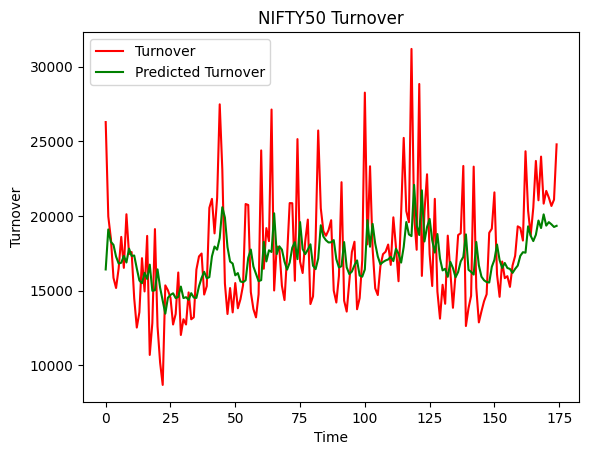

In [16]:
# plot predictions vs real turnover on training set
predicted = lstm_model.predict(X_train)
predicted = sc.inverse_transform(predicted)
plt.plot(sc.inverse_transform(train[-175:]), color = 'red', label = 'Turnover')
plt.plot(predicted, color = 'green', label = 'Predicted Turnover')
plt.title('NIFTY50 Turnover')
plt.xlabel('Time')
plt.ylabel('Turnover')
plt.legend()
plt.show()

2/2 [==============================] - 0s 3ms/step


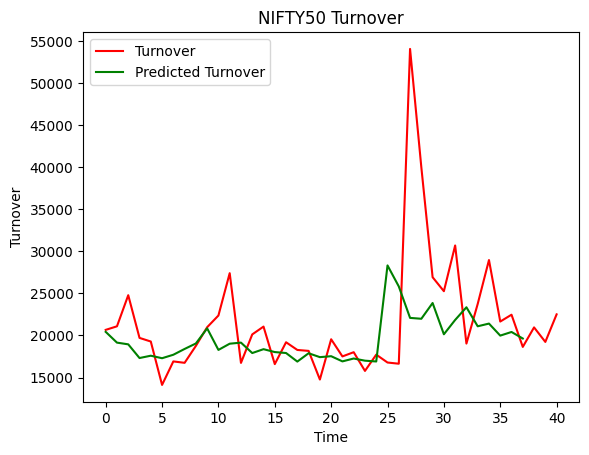

In [17]:
# plotting predictions vs true turnover for the test set
predicted = lstm_model.predict(X_test)
predicted = sc.inverse_transform(predicted)
plt.plot(sc.inverse_transform(test[-41:]), color = 'red', label = 'Turnover')
plt.plot(predicted, color = 'green', label = 'Predicted Turnover')
plt.title('NIFTY50 Turnover')
plt.xlabel('Time')
plt.ylabel('Turnover')
plt.legend()
plt.show()